## Exploring the Breast Cancer Dataset

__Author__ Syamanthaka B

The below notebook takes a wholistic look at a publicly available data set and tries to find the best approach to analyzing the data and coming up with results. There is a combination of theoretical information noted from various sources, as we go about exploring the dataset.

With that intro, diving in, we have a dataset for breast cancer, with 9 input parameters, namely:
*'ClumpThickness', 'CellSize', 'CellShape', 'MarginalAdhesion', 'EpithelialCellSize', 'BareNeuclei', BlandChromatin', 'NormalNeucleoli', 'Mitoses'*
and a label or class identifyer, to classify the tumour as malignant or benign. So the problem statement is to use this dataset to learn/train a model, and then any new dataset coming in has to be __classified__ as malignant or benign. Which means we are dealing with a __classification problem__. 

Class 2 - benign
Class 4 - malignant


#### Lets first explore the basics of the data itself

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_table("breast-cancer-wisconsin.data", sep=",", 
                   names=['ID', 'ClumpThickness', 'CellSize', 'CellShape', 'MarginalAdhesion', 
                          'EpithelialCellSize', 'BareNeuclei', 'BlandChromatin', 'NormalNeucleoli', 
                                                                     'Mitoses', 'Class'])
df.head()

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,EpithelialCellSize,BareNeuclei,BlandChromatin,NormalNeucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

In [4]:
df.isnull().sum()
df.isna().sum()

ID                    0
ClumpThickness        0
CellSize              0
CellShape             0
MarginalAdhesion      0
EpithelialCellSize    0
BareNeuclei           0
BlandChromatin        0
NormalNeucleoli       0
Mitoses               0
Class                 0
dtype: int64

In [5]:
df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Check if any column needs scaling

In [6]:
columns = list(df)
for i in columns: 
    # printing the min and max of each column 
    print(i + " - Max: " + str(df[i].max()) + " || Min: " + str(df[i].min()))

ID - Max: 13454352 || Min: 61634
ClumpThickness - Max: 10 || Min: 1
CellSize - Max: 10 || Min: 1
CellShape - Max: 10 || Min: 1
MarginalAdhesion - Max: 10 || Min: 1
EpithelialCellSize - Max: 10 || Min: 1
BareNeuclei - Max: ? || Min: 1
BlandChromatin - Max: 10 || Min: 1
NormalNeucleoli - Max: 10 || Min: 1
Mitoses - Max: 10 || Min: 1
Class - Max: 4 || Min: 2


In [7]:
print(len(df[df['BareNeuclei'] == '?'] ))

16


Every column lies in 1-10 range, so no need of scaling. But BareNeuclei column has few missing rows, represented by '?'. 


Encoding is also not required for the Class column, it is already encoded as 2 and 4

In [9]:
df = df[df['BareNeuclei'] != '?']
print(len(df[df['BareNeuclei'] == '?'] ))
print(len(df))

0
683


In [10]:
df = df.drop(columns=['ID']) # This column is not a feature per se, and can skew the results, so dropping it

#### Need to visualize the data set to see if there are any obvious patterns etc

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

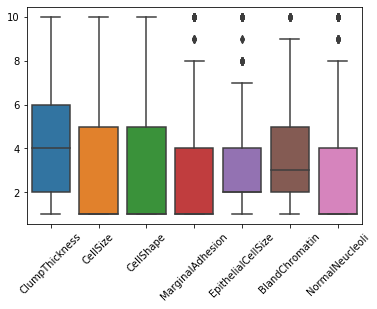

In [8]:
box_plot = sns.boxplot(data=df.iloc[:,1:9])
plt.xticks(rotation=45)

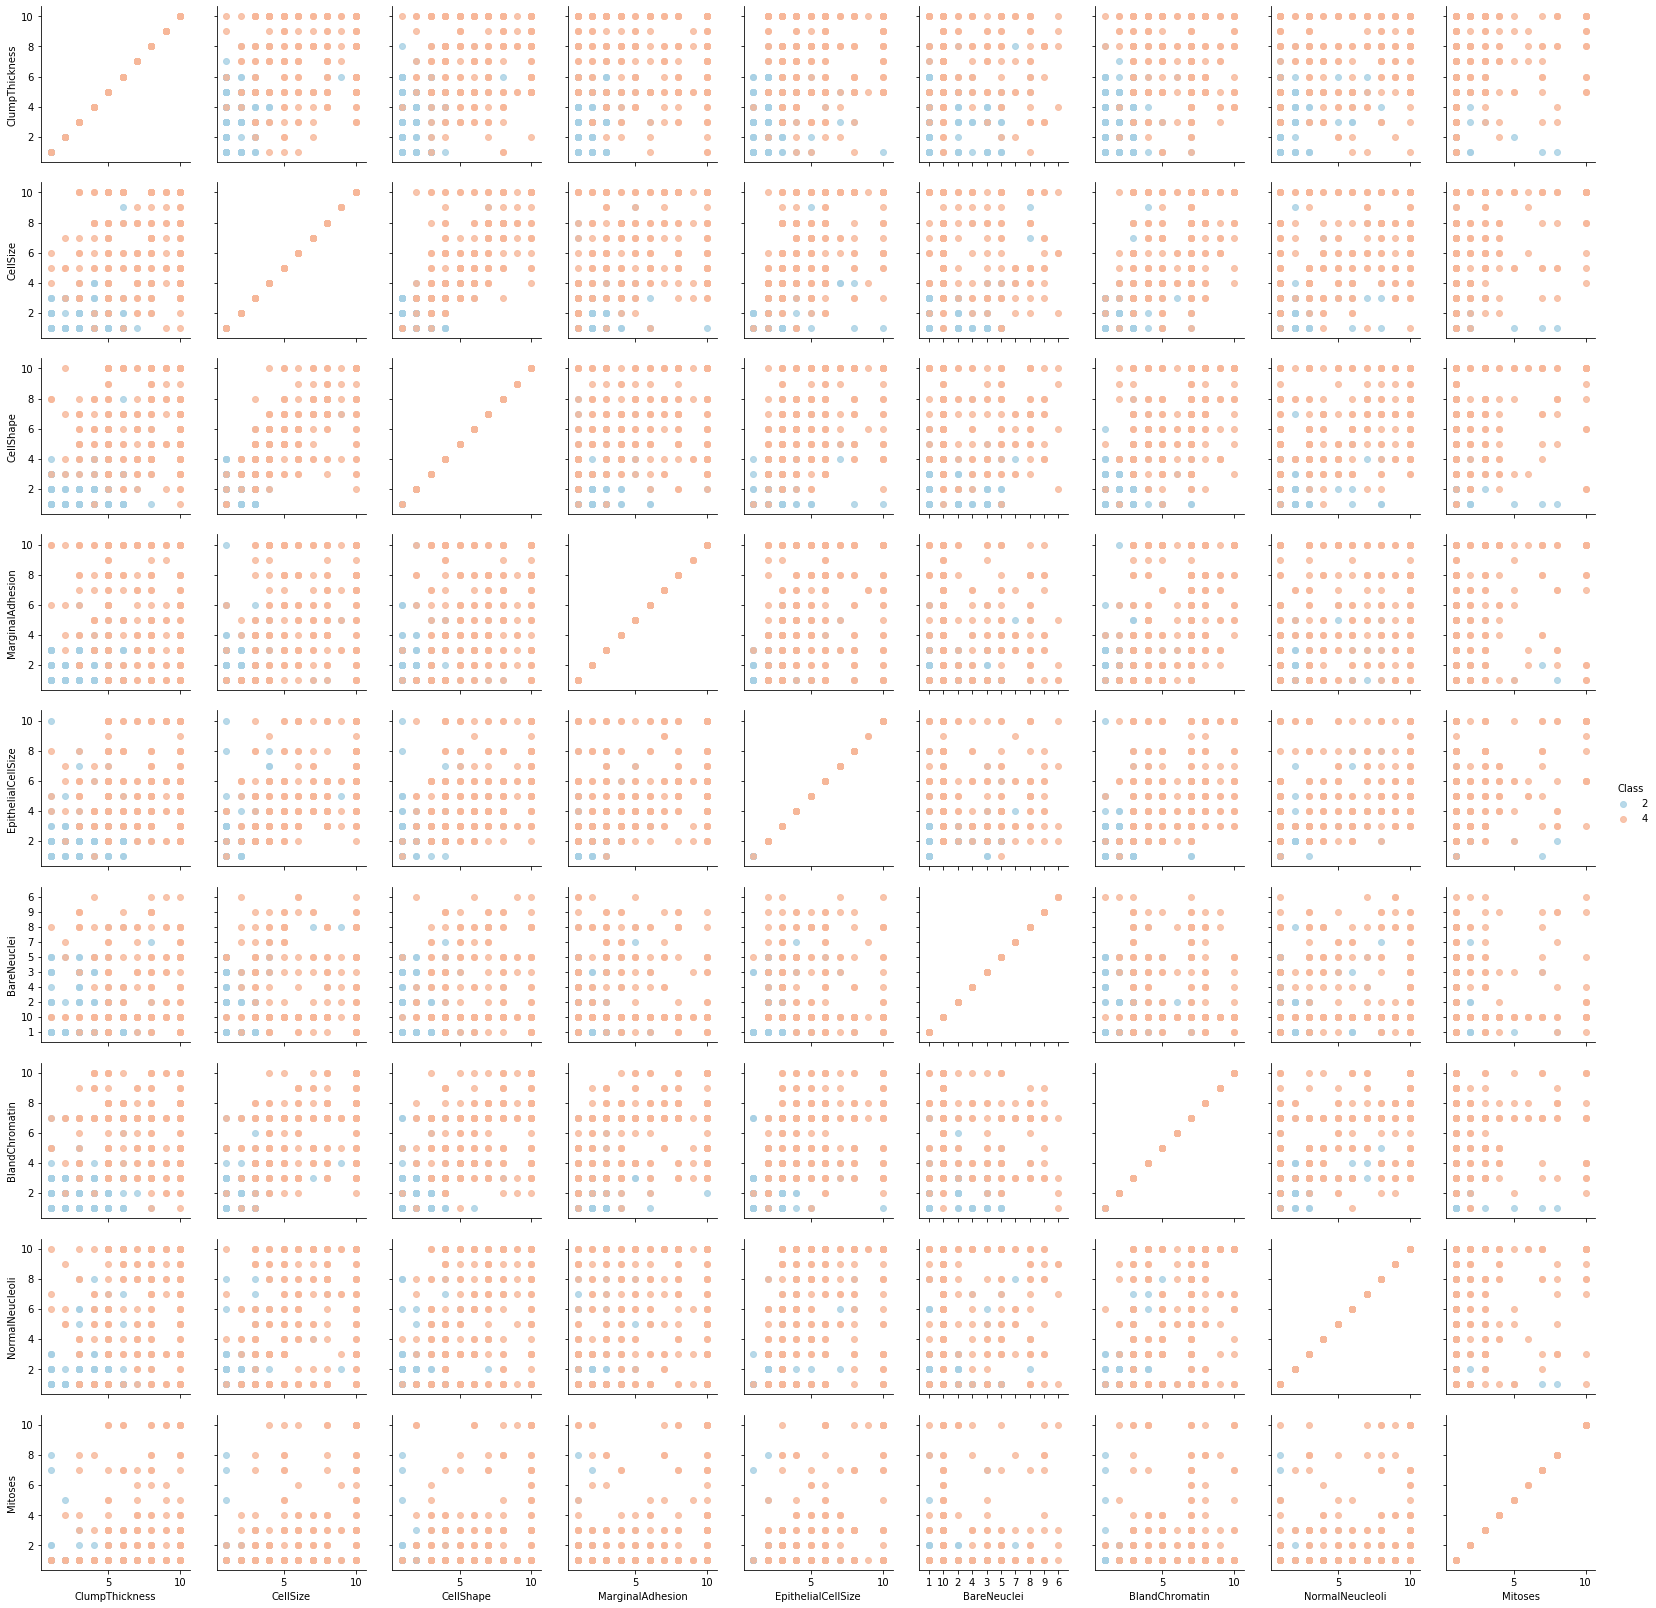

In [91]:
g = sns.PairGrid(df, vars=['ClumpThickness', 'CellSize', 'CellShape', 'MarginalAdhesion', 'EpithelialCellSize', 
'BareNeuclei', 'BlandChromatin','NormalNeucleoli', 'Mitoses'],
                 hue='Class', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

C:\Users\320054667\AppData\Local\Continuum\anaconda3\envs\ml_envt\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\320054667\AppData\Local\Continuum\anaconda3\envs\ml_envt\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


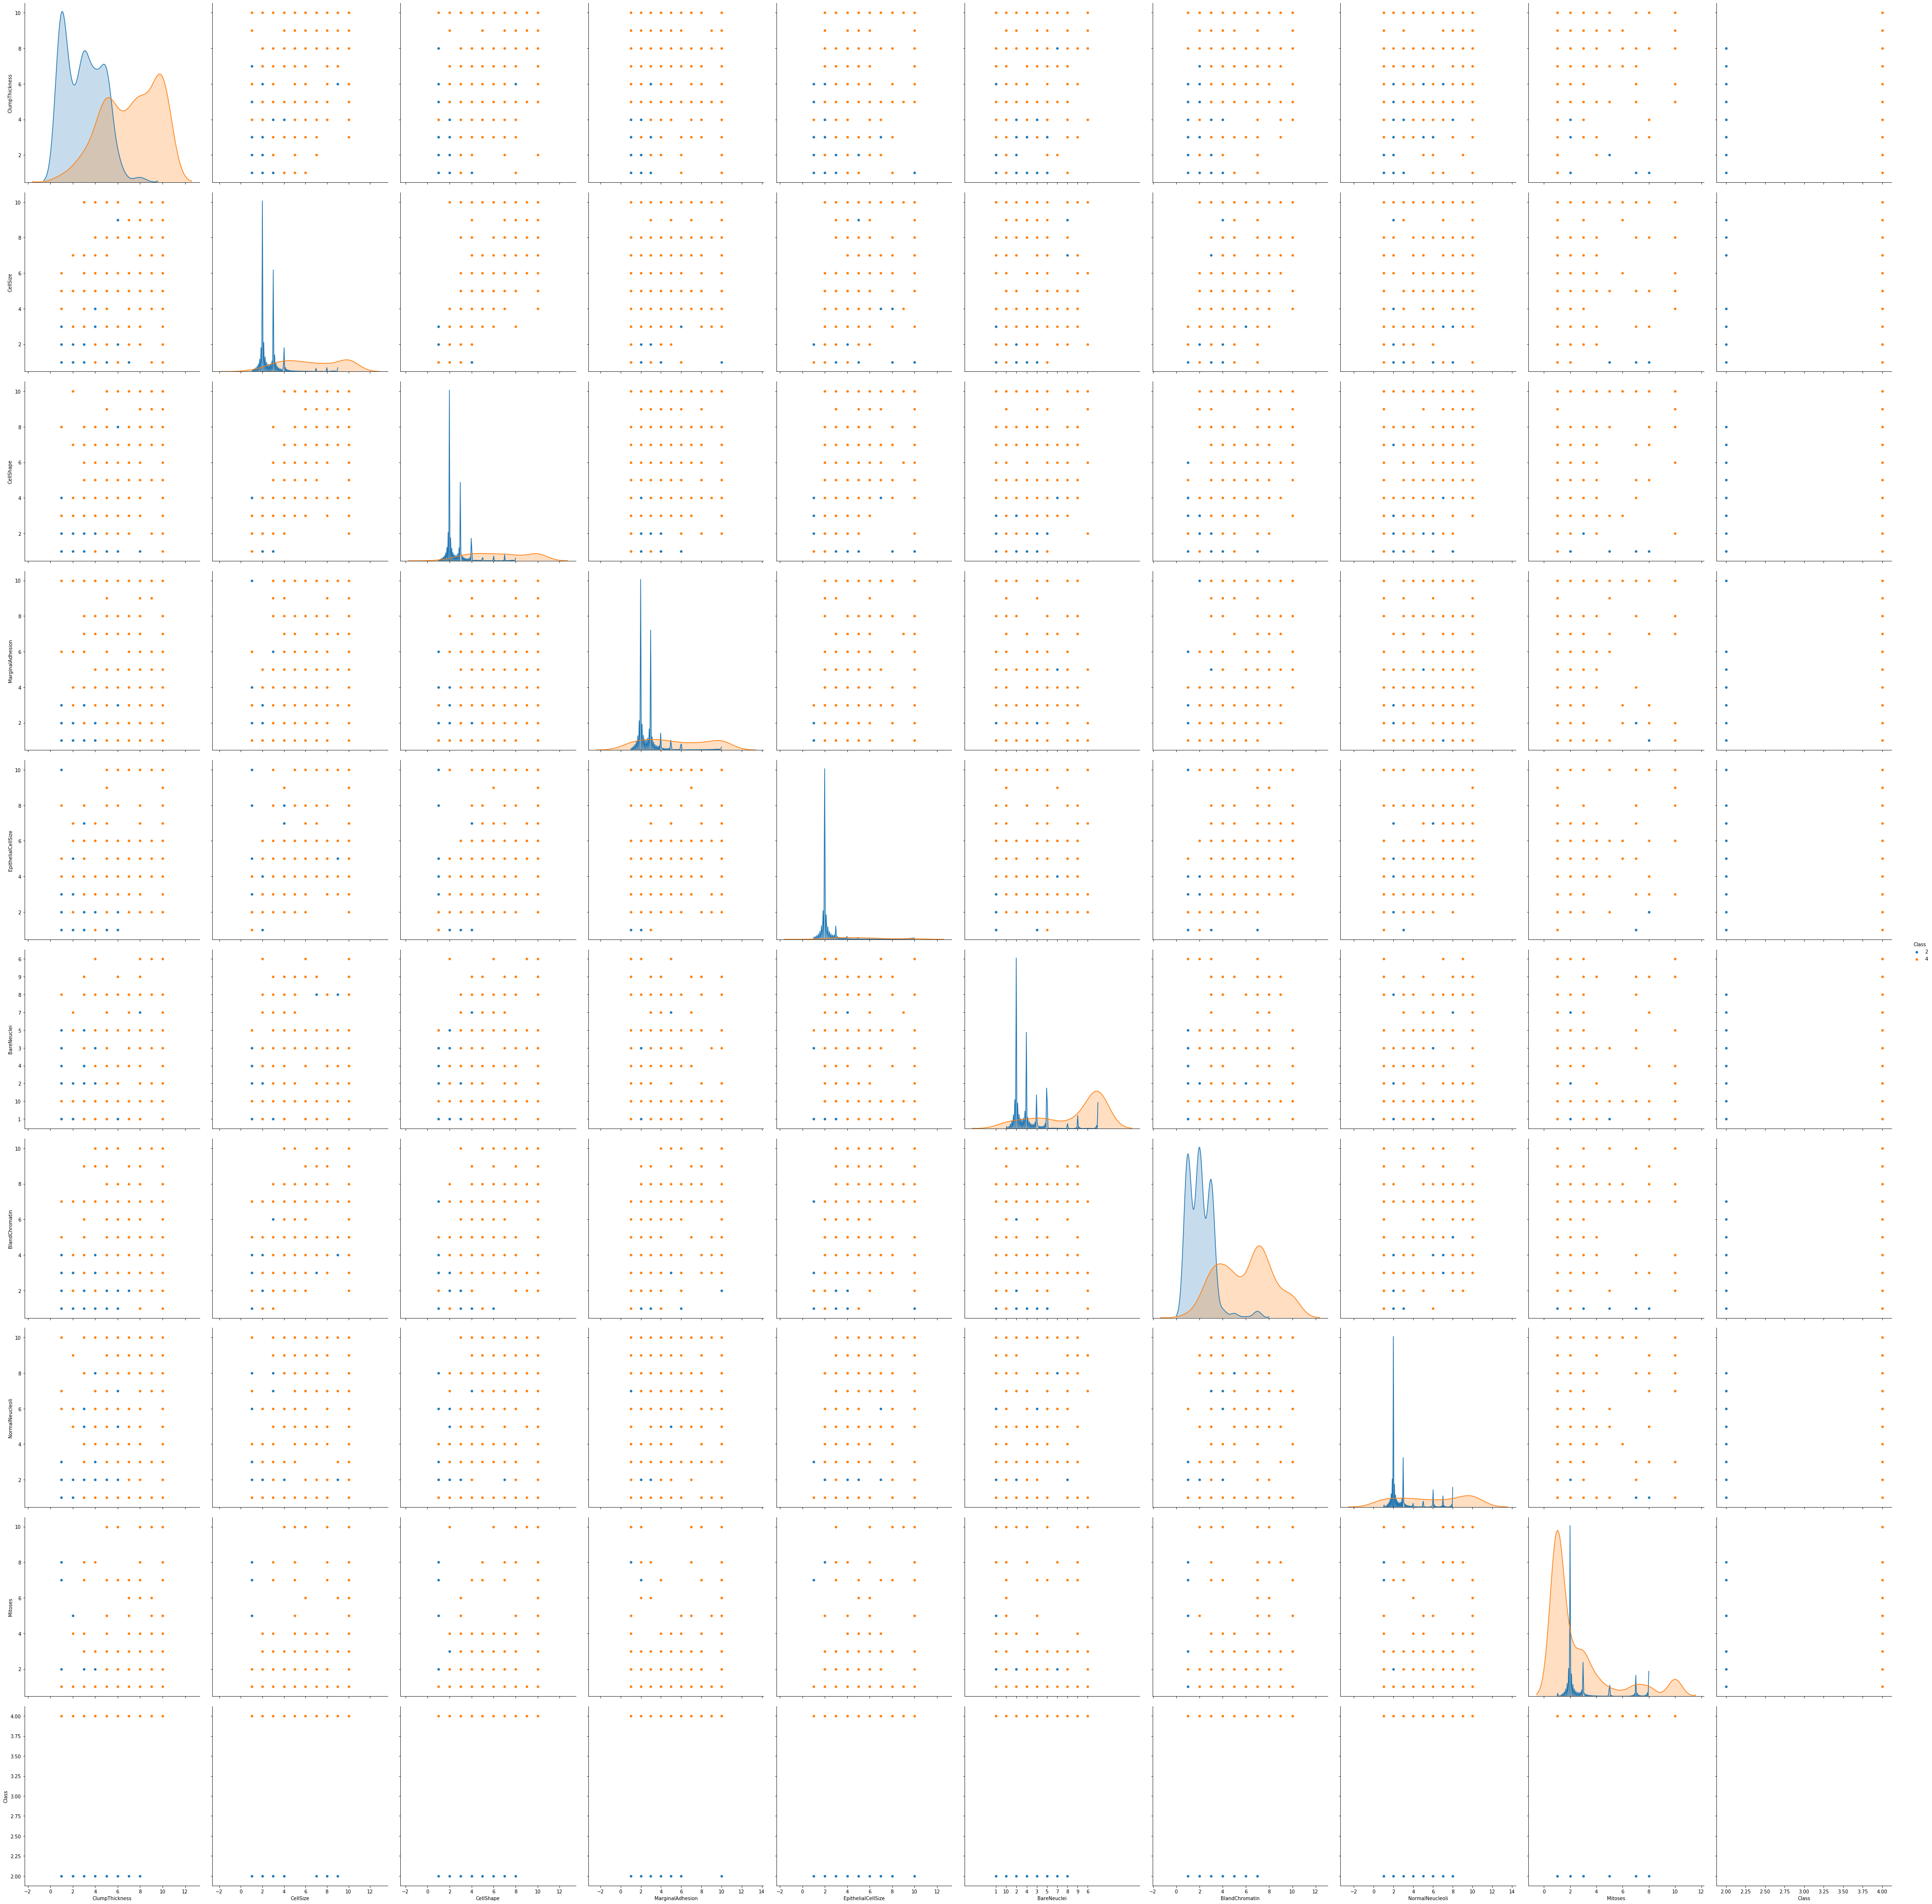

In [92]:
sns.pairplot(df, hue='Class', height=5.5);

#### Which algorithm to use?

Since this is a classification problem, as a first approach, let us try __Decision Tree algorithm__.
Decision tree works as a series of __if-else__ decisions to finally conclude on which class should a row of data fall under. 

__Classification tree__ has 3 types of nodes:

__Root node__ has 0 incoming edges and 0 or more outgoing edges

__Internal node__ has 1 incomig edge and 2 or more outgoing edges

__Leaf node__ has 1 incoming edge and 0 outgoing edges

#### How to decide on the attribute to use for partitioning in a decision tree?

There are algorithms to decide on the major attribute to start the decision tree. 

Eg. __Hunt algorith__ - where starting with a feature, if all records have same class, then that becomes leaf node. Else, a test condition is selected, and partitioning begins, recursively until all leaf nodes are found.

The attribute can be split as __binary, nominal, ordinal or continuous__. 

The best split is defined by degree of impurity of child nodes measured by __Entropy, Gini, Classification Error__ etc. 

The feature to be chosen first is decided by the number of occurances of the class among the training samples in a rule based approach. i.e Majority class is taken as default class and minority class is learnt by rules.

__Accuracy__ and __coverage__ need to be taken into account to validate effectiveness of the rule. 

__Accuracy__ = No. of records satifying the rule antecedent (LHS)/ Total number of records.

__Coverage__ = No. of records satisfying LHS and RHS (rule consequence) / Total number of records.



In [48]:
X = df.drop(columns=['Class'])
Y = df['Class']

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

In [49]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X, Y)
print(dt_clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [50]:
dt_clf.get_depth()

9

In [51]:
feature_names = ['ClumpThickness', 'CellSize', 'CellShape', 'MarginalAdhesion', 'EpithelialCellSize', 
'BareNeuclei', 'BlandChromatin','NormalNeucleoli', 'Mitoses']
dt_txt = export_text(dt_clf, feature_names = feature_names)
print(dt_txt)

|--- CellSize <= 2.50
|   |--- BareNeuclei <= 5.50
|   |   |--- ClumpThickness <= 6.50
|   |   |   |--- NormalNeucleoli <= 9.00
|   |   |   |   |--- BareNeuclei <= 4.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- BareNeuclei >  4.50
|   |   |   |   |   |--- EpithelialCellSize <= 1.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- EpithelialCellSize >  1.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- NormalNeucleoli >  9.00
|   |   |   |   |--- class: 4
|   |   |--- ClumpThickness >  6.50
|   |   |   |--- CellShape <= 2.50
|   |   |   |   |--- class: 2
|   |   |   |--- CellShape >  2.50
|   |   |   |   |--- class: 4
|   |--- BareNeuclei >  5.50
|   |   |--- ClumpThickness <= 2.50
|   |   |   |--- class: 2
|   |   |--- ClumpThickness >  2.50
|   |   |   |--- class: 4
|--- CellSize >  2.50
|   |--- CellShape <= 2.50
|   |   |--- ClumpThickness <= 5.50
|   |   |   |--- BareNeuclei <= 7.50
|   |   |   |   |--- class: 2
|   |   |   |--- BareNeuclei >  7.

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 9) #selecting 5 features

X_new = selector.fit_transform(X, Y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

           Feat_names     F_Scores
5         BareNeuclei  1426.240270
2           CellShape  1417.643841
1            CellSize  1406.132470
6      BlandChromatin   921.010015
7     NormalNeucleoli   727.470805
0      ClumpThickness   711.423446
3    MarginalAdhesion   677.878400
4  EpithelialCellSize   622.157681
8             Mitoses   148.787689


#### Gini index 

* Used in the Classfication and Regresstion Tree (CART) of decision trees. 
* Favours larger partition of splits
* 1 - sum of square of probabilty of each class
* Ideal to have lower gini index

#### First split the data into training and test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(512, 9)
(512,)
(171, 9)
(171,)


In [47]:
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(Y_train))

# Inspect `y_train`
print(len(Y_train))

512
9
512


In [56]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, Y_train)
print(dt_clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [57]:
Y_pred_dt = dt_clf.predict(X_test)

In [87]:
print(Y_pred_dt[0])
print(Y_test[0])
print(X_test[0])
print(X_train[0])

2
2
[1 1 1 1 2 '5' 1 1 1]
[7 6 10 5 3 '10' 9 10 2]


In [90]:
df.dtypes

ClumpThickness         int64
CellSize               int64
CellShape              int64
MarginalAdhesion       int64
EpithelialCellSize     int64
BareNeuclei           object
BlandChromatin         int64
NormalNeucleoli        int64
Mitoses                int64
Class                  int64
dtype: object

#### Check accuracy of Decision tree

In [62]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(Y_test, Y_pred_dt)
print(cm_dt)

[[105   2]
 [  8  56]]


__Accuracy__ = Number of correct preditions / Total number of predictions 

From above confusion matrix -> 105 is correct predictions of class 1 
                               2 is incorrect predictions of class 1
                               8 is incorrect predictions of class 2
                                56 is corecct predictions of class 2
                                
So total correct predictions = 105 + 56 = 161
Total predictions = 171 (Y_test)

In [61]:
accuracy_dt = 161/171 * 100
accuracy_dt

94.15204678362574

<hr>

#### Dimensionality Reduction

Now since we see that there are 8 features which could have an effect on the class, an attempt is to be made to reduced the dimensionality. So basically, to select the most important features.

Let us try PCA or Principal Component Analysis to find the 2 principal features from this data.

In [63]:
from sklearn.decomposition import PCA

In [71]:
n_components = min(n_samples, n_features)
n_components

9

In [74]:
pca = PCA(n_components=2)
pca_x = pca.fit(X_train).transform(X_train)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


Text(0.5, 1.0, 'PCA of IRIS dataset')

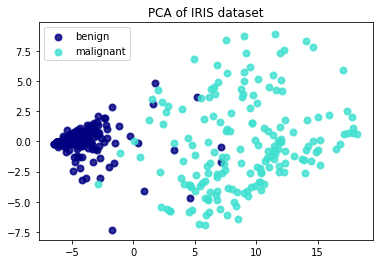

In [75]:
colors = ['navy', 'turquoise']
target_names = ['benign', 'malignant']
lw = 2
for color, i, target_name in zip(colors, [2, 4], target_names):
    plt.scatter(pca_x[Y_train == i, 0], pca_x[Y_train == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

#### Now to select the algorithm

Using the sklearn cheat sheet below, 

Start __=>__ >50 samples __=>__ Predicting a category __=>__ No. of categories known __=>__ <100K samples __=>__ KMeans

__*Leads to KMeans*__ and/or __*Linear SVC*__

<img src="Algorithm_cheat_Sheet1.png">

#### Trying KMeans first

In [76]:
from sklearn import cluster

clf_km = cluster.KMeans(init='k-means++', n_clusters=2)
clf_km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
Y_pred_km = clf_km.predict(X_test)

In [78]:
cm_km = confusion_matrix(Y_test, Y_pred_km)
print(cm_km)

[[  0   0   0   0]
 [  0   0   0   0]
 [  4 103   0   0]
 [ 55   9   0   0]]


silhouette coefficient - clustering performance

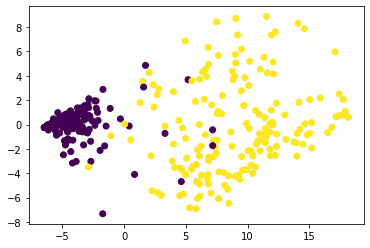

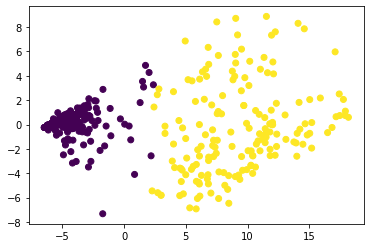

In [79]:
plt.figure('Reference')
pca = PCA(n_components=2)
PCA_test = pca.fit(X_train).transform(X_train)
plt.scatter(PCA_test[:,0], PCA_test[:,1], c=Y_train)

kmeans = cluster.KMeans(n_clusters=2, random_state=111)
kmeans.fit(X_train)

plt.figure('K-means')
plt.scatter(PCA_test[:,0], PCA_test[:,1], c=kmeans.labels_)
plt.show()

In [ ]:
# Predict the labels for `X_test`
y_pred=kmeans.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(Y_test[:100])

# Study the shape of the cluster centers
clf.cluster_centers_.shape

In [ ]:
plt.scatter(y_pred, Y_test, c=Y_test)

In [ ]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = kmeans.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=Y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

In [ ]:
# Import `PCA()`
from sklearn.decomposition import PCA

# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = kmeans.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=Y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

#### Trying SVC

In [ ]:
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, Y_train)

In [ ]:
predicted = svc_model.predict(X_test)

In [ ]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_model.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=Y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) #, max_features=4)
decision_tree = decision_tree.fit(X_train, Y_train)
r = export_text(decision_tree, feature_names=df['Class'])
print(r)

In [ ]:
names = open("breast-cancer-wisconsin.names", "r")
for i in names:
    print(i)